In [25]:
from parselmouth import praat
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

sns.set()
plt.rcParams['figure.dpi'] = 100

In [23]:
def draw_pitch(pitch):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def getFormant(sound):
    f0min=75
    f0max=300
    pointProcess = praat.call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    formants = praat.call(sound, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)
    numPoints = praat.call(pointProcess, "Get number of points")
    f1_list = []
    f2_list = []
    f3_list = []
    for point in range(0, numPoints):
        point += 1
        t = praat.call(pointProcess, "Get time from index", point)
        f1 = praat.call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = praat.call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f3 = praat.call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
        f3_list.append(f3)
    print("F1 List", f1_list)
    print("F2 List", f2_list)
    print("F3 List", f3_list)
    return {
        "F1 List" : f1_list,
        "F2 List" : f2_list,
        "F3 List" : f3_list
    }
    

F1 List [654.2104834929487, 626.4011959280444, 587.3897038674825, 511.6275089979328, 413.69579137728385, 751.5725572586713, 779.6702835863233, 466.7863005799855, 329.9139327081585, 373.9410095446175, 365.7000997738061, 357.2327470962716, 357.23305813350436, 350.66629294404686, 354.9464468761108, 364.32502206682403, 364.0174983583644, 355.09030863895816, 360.90794704260344, 360.38833189427623, 353.0126129614268, nan, nan]
F2 List [1372.167644146377, 1373.1496788248216, 1320.8120407351857, 1272.7750552776079, 1223.3061732619808, 881.7509533700527, 938.3211176519746, 1478.3815000040624, 943.4713690678412, 932.5684891144815, 935.4566296463249, 934.1330898553322, 953.3744301563386, 966.9224556655411, 958.8834495502832, 959.607399080039, 999.1159932484288, 973.0443457833576, 1007.7155068256011, 1045.6574266324942, 1057.0126132794355, nan, nan]
F3 List [2438.378364168203, 2442.029681119864, 2451.984742706082, 2372.184274790775, 2350.661242203357, 2344.9402403472295, 2397.5644651364078, 2860.2

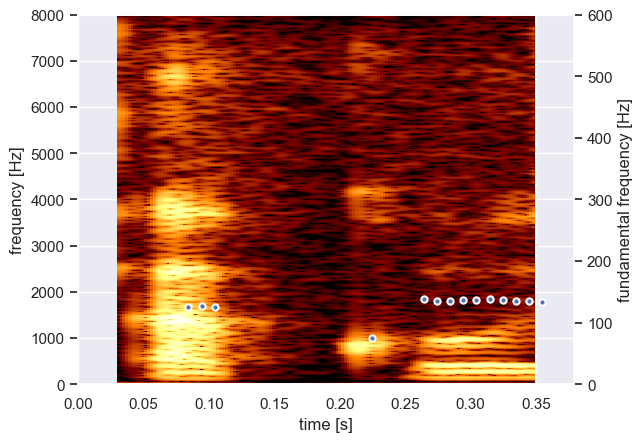

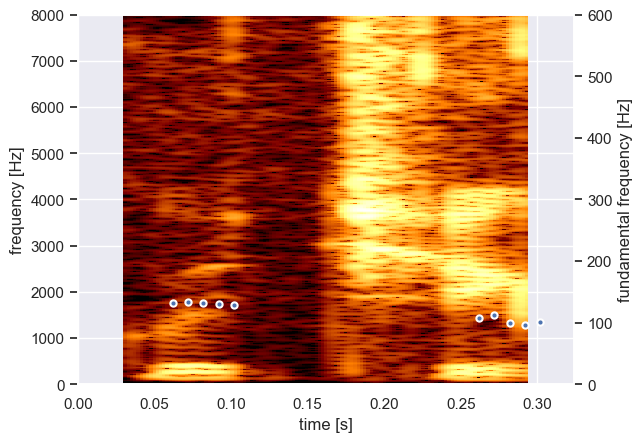

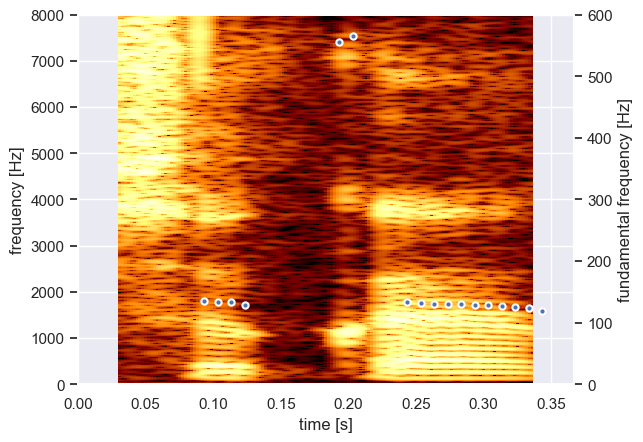

In [28]:
fake_path = 'fake-sound/splitted'
fake_files = glob.glob(fake_path + '/*.wav')

real_path = 'sound/splitted'
real_files = glob.glob(real_path + '/*.wav')

for soundpath in fake_files :
    snd = parselmouth.Sound(soundpath)
    pitch = snd.to_pitch()
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax])
    plt.savefig(soundpath + ".png")

for soundpath in real_files :
    snd = parselmouth.Sound(soundpath)
    pitch = snd.to_pitch()
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax])
    plt.savefig(soundpath + ".png")

for soundpath in real_files : 
    snd = parselmouth.Sound(soundpath)
    file1 = open(soundpath + ".txt","w")
    formant = getFormant(snd)
    json_object = json.dumps(formant, indent = 4) 
    file1.write(json_object)
    file1.close()

for soundpath in fake_files : 
    snd = parselmouth.Sound(soundpath)
    file1 = open(soundpath + ".txt","w")
    formant = getFormant(snd)
    json_object = json.dumps(formant, indent = 4) 
    file1.write(json_object)
    file1.close()